In [3]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, roc_curve, precision_score, roc_auc_score, f1_score
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv("data/mushrooms.csv")
df.shape

(8124, 23)

In [6]:
df.head().T

,0,1,2,3,4
class,p,e,e,p,e
cap-shape,x,x,b,x,x
cap-surface,s,s,s,y,s
cap-color,n,y,w,w,g
bruises,t,t,t,t,f
odor,p,a,l,p,n
gill-attachment,f,f,f,f,f
gill-spacing,c,c,c,c,w
gill-size,n,b,b,n,b
gill-color,k,k,n,n,k


In [7]:
# X = df.drop(["class"], axis=1)
# y = df["class"]
# X = pd.get_dummies(X)
# X.head()

In [8]:
labelencoder=LabelEncoder()
for col in df.columns:
    df[col] = labelencoder.fit_transform(df[col])

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [9]:
X = df.drop(["class"], axis=1)
y = df["class"]

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=6)

clf = LogisticRegression()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

print("Accuracy: "+ str(clf.score(X_test,y_test)))
print("Recall: " + str(round(recall_score(y_test, y_pred),3)))
print("Precision: " + str(round(precision_score(y_test,  y_pred),3)))
print("F1-measure: " + str(round(f1_score(y_test,  y_pred),3)))

confusion_matrix(y_test,y_pred)

Accuracy: 0.9464615384615385
Recall: 0.927
Precision: 0.96
F1-measure: 0.943


array([[818,  30],
       [ 57, 720]], dtype=int64)

Text(0.5,1,'Classification - TOP20 features (importance)')

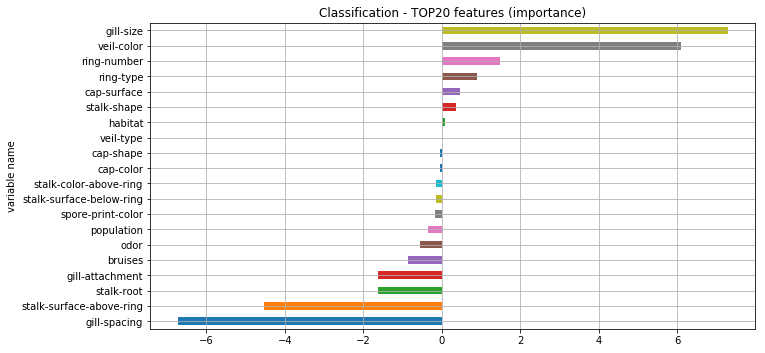

In [11]:
values = clf.coef_[0]
names = X_train.columns

importance = pd.DataFrame({"value": values, "name": names}).sort_values("value")
importance = importance.set_index("name")

# TOP20 FACTORS
top20 = pd.concat([importance["value"].head(10),importance["value"].tail(10)])

fig, ax = plt.subplots(figsize=(12,5), gridspec_kw={"top": 0.90, "bottom":0.05, "left":0.2})

top20.plot.barh(ax=ax)

plt.rcParams['axes.axisbelow'] = True
plt.ylabel("variable name")
plt.grid(True)
plt.title("Classification - TOP20 features (importance)")

In [12]:
importance

,value
name,
gill-spacing,-6.732338
stalk-surface-above-ring,-4.534481
stalk-root,-1.627720
gill-attachment,-1.617016
bruises,-0.868566
odor,-0.556636
population,-0.358122
spore-print-color,-0.183863
stalk-surface-below-ring,-0.160025


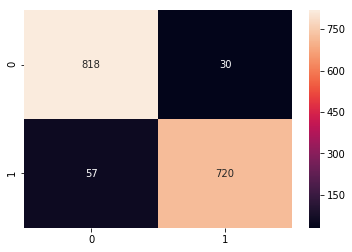

In [14]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d")

In [16]:
X = df.drop("class", axis = 1)

coeff_df = pd.DataFrame(X.columns)
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(clf.coef_[0])
pd.Series(clf.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
7,gill-size,7.283243
16,veil-color,6.095159
17,ring-number,1.474854
18,ring-type,0.909291
1,cap-surface,0.452124
9,stalk-shape,0.354805
21,habitat,0.070842
15,veil-type,0.000000
0,cap-shape,-0.039664
2,cap-color,-0.050503
